In [269]:
# Data Manipulation & Numerical Operations
import pandas as pd  
import numpy as np  
import re

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# For ignoring warinings
import warnings
warnings.filterwarnings('ignore')


# Machine Learning Libraries
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [270]:
Dataset = pd.read_csv("../dataset/Mobiles Dataset (2025).csv", encoding='latin1')

In [271]:
Dataset

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [272]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [273]:
Dataset.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [274]:
Dataset.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [275]:
# renaming columns names
Dataset.rename(columns={
    "Mobile Weight": "Weight(g)", 
    "RAM": "RAM(GB)", 
    "Front Camera": "Front(MP)", 
    "Back Camera": "Back(MP)", 
    "Battery Capacity": "Battery(mAh)", 
    "Screen Size": "Size(inch)",    
}, inplace=True)

In [276]:
# removing units from dataset values
import re
def ConvertValue(value, unit=None):
    number = re.sub(r'[^\d.]', '', value)
    
    if not number: return np.nan
    
    parts = number.split('.')
    
    if len(parts) > 1: number = f"{parts[0]}.{''.join(parts[1:])}" 
    else: number = parts[0]
    
    if '.' in number: number = float(number)
    else: number = int(number)
        
    if unit == 'PKR': number *= 0.003
    elif unit == 'INR': number *= 0.01
    elif unit == 'CNY': number *= 0.14
    elif unit == 'AED': number *= 0.27
    return number

Dataset['RAM(GB)'] = Dataset['RAM(GB)'].apply(lambda x: ConvertValue(x))
Dataset['Battery(mAh)'] = Dataset['Battery(mAh)'].apply(lambda x: ConvertValue(x))
Dataset['Size(inch)'] = Dataset['Size(inch)'].apply(lambda x: ConvertValue(x))
Dataset['Back(MP)'] = Dataset['Back(MP)'].apply(lambda x: ConvertValue(x))
Dataset['Front(MP)'] = Dataset['Front(MP)'].apply(lambda x: ConvertValue(x))
Dataset['Weight(g)'] = Dataset['Weight(g)'].apply(lambda x: ConvertValue(x))
# Converting all the launched prices into global currency(Dollar)
Dataset['Launched Price (USA)'] = Dataset['Launched Price (USA)'].apply(lambda x: ConvertValue(x))
Dataset['Launched Price (Pakistan)'] = Dataset['Launched Price (Pakistan)'].apply(lambda x: ConvertValue(x, 'PKR'))
Dataset['Launched Price (India)'] = Dataset['Launched Price (India)'].apply(lambda x: ConvertValue(x, 'INR'))
Dataset['Launched Price (China)'] = Dataset['Launched Price (China)'].apply(lambda x: ConvertValue(x, 'CNY'))
Dataset['Launched Price (Dubai)'] = Dataset['Launched Price (Dubai)'].apply(lambda x: ConvertValue(x, 'AED'))
# Adding average price columns in dataset
Dataset["Avg_Price_USD"] = Dataset[
    ["Launched Price (Pakistan)", "Launched Price (India)", "Launched Price (China)", "Launched Price (Dubai)", "Launched Price (USA)"]
].mean(axis=1)


In [277]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               930 non-null    object 
 1   Model Name                 930 non-null    object 
 2   Weight(g)                  930 non-null    float64
 3   RAM(GB)                    930 non-null    float64
 4   Front(MP)                  930 non-null    float64
 5   Back(MP)                   930 non-null    float64
 6   Processor                  930 non-null    object 
 7   Battery(mAh)               930 non-null    int64  
 8   Size(inch)                 930 non-null    float64
 9   Launched Price (Pakistan)  929 non-null    float64
 10  Launched Price (India)     930 non-null    float64
 11  Launched Price (China)     930 non-null    float64
 12  Launched Price (USA)       930 non-null    float64
 13  Launched Price (Dubai)     930 non-null    float64

In [278]:
Dataset.isnull().sum()

Company Name                 0
Model Name                   0
Weight(g)                    0
RAM(GB)                      0
Front(MP)                    0
Back(MP)                     0
Processor                    0
Battery(mAh)                 0
Size(inch)                   0
Launched Price (Pakistan)    1
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
Avg_Price_USD                0
dtype: int64

In [279]:
# removing na values
Dataset = Dataset.dropna()

In [280]:
# analysis of RAM columsn
Dataset["RAM(GB)"].unique()

array([  6. ,   8. ,   4. ,   3. ,  12. ,   2. ,   1.5,  16. ,  10. ,
         1. , 812. ])

In [281]:
# finding the most repeated values in the ram column
Dataset['RAM(GB)'].value_counts()

RAM(GB)
8.0      308
6.0      206
12.0     192
4.0      146
3.0       34
16.0      31
2.0        6
1.5        2
812.0      2
10.0       1
1.0        1
Name: count, dtype: int64

In [282]:
# general filter, removing outliers and uninteresting values for analysis
Dataset = Dataset[~Dataset['RAM(GB)'].isin([812.0, 1.5, 10.0, 1.0, 2.0])]

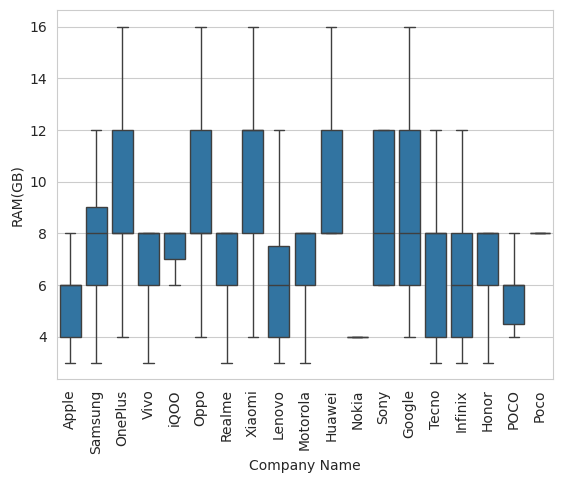

In [283]:
# visualization of ram distribution by smartphone brands
sns.boxplot(data=Dataset, x='Company Name', y='RAM(GB)', showfliers=False)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='RAM(GB)', ylabel='Launched Year'>

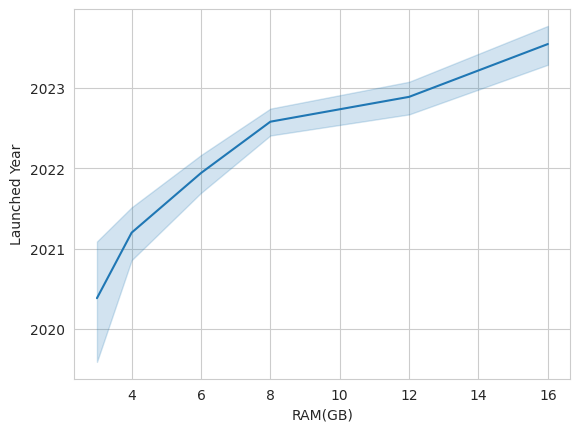

In [284]:
# visualization of the evolution of ram configuration over the release years
sns.set_style("whitegrid")
sns.lineplot(data=Dataset, x='RAM(GB)', y='Launched Year', estimator='mean')

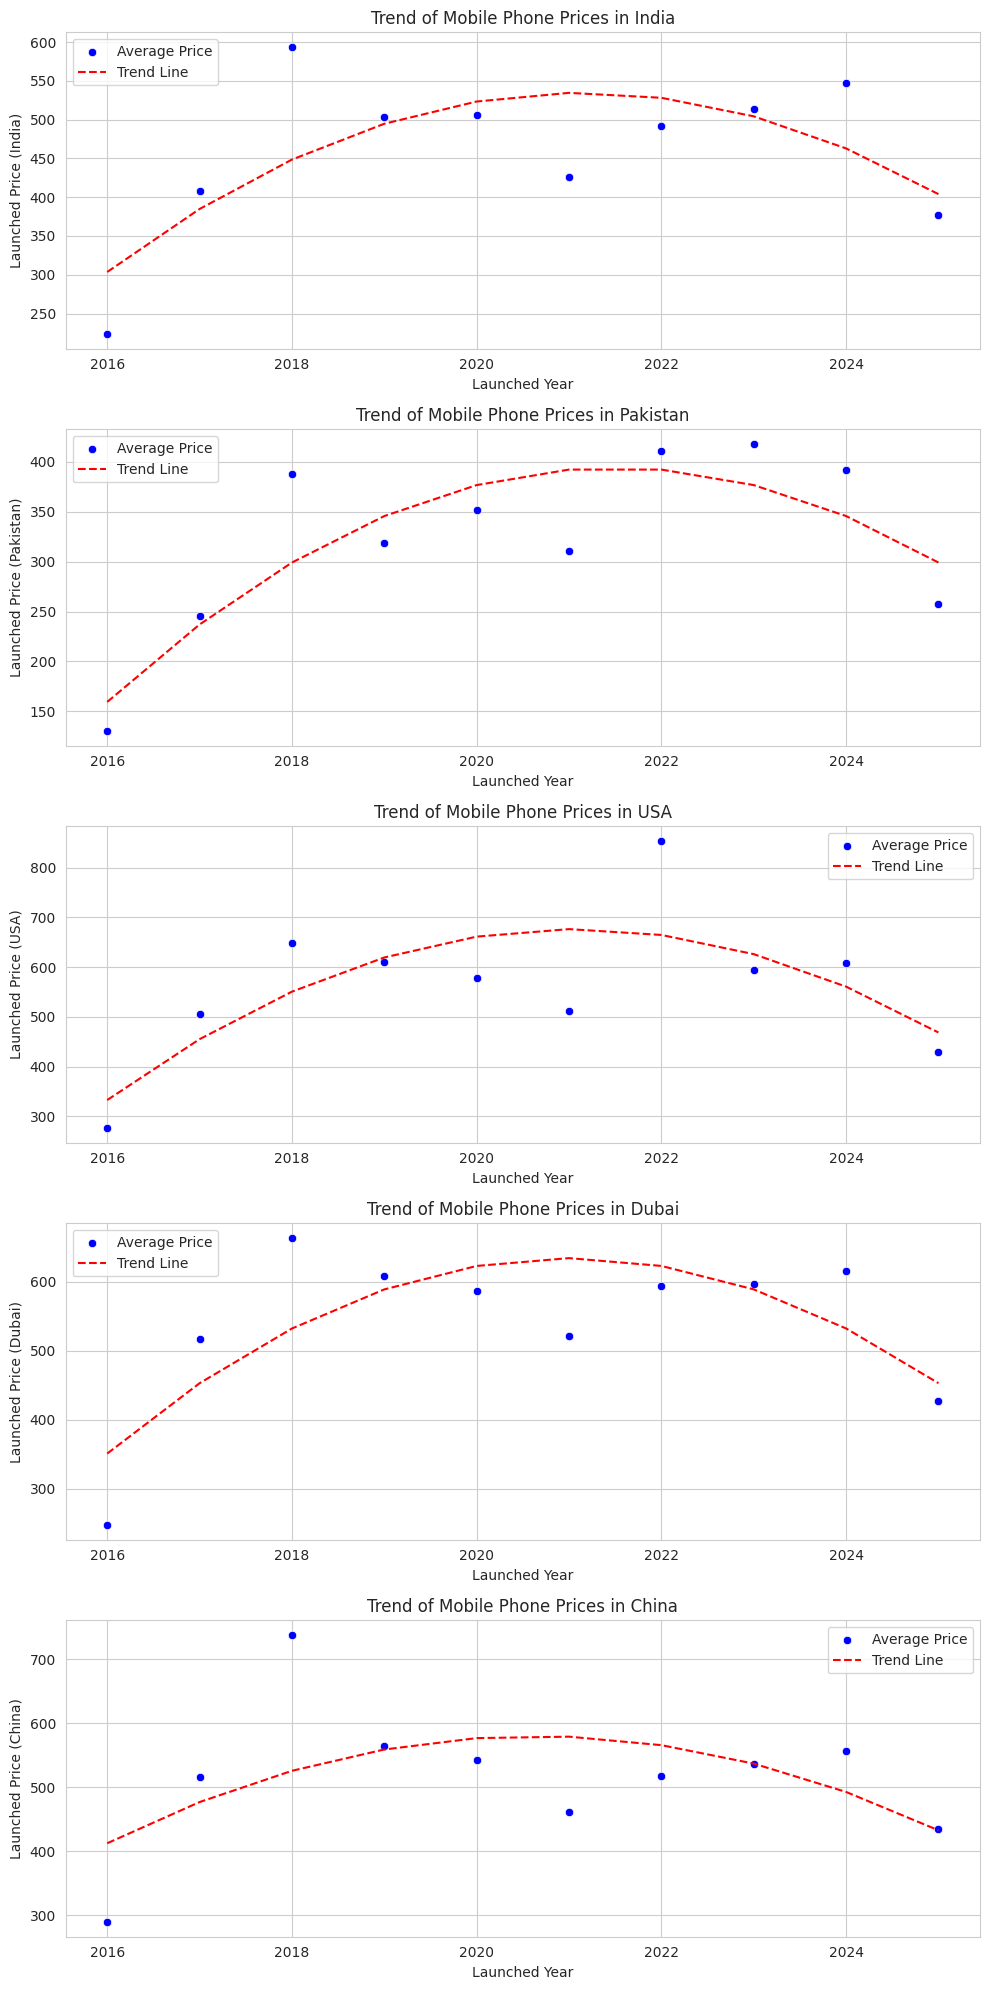

In [285]:
# Trend of Mobile phone in different countries
# List of price columns for different countries
price_columns = [
    "Launched Price (India)",
    "Launched Price (Pakistan)",
    "Launched Price (USA)",
    "Launched Price (Dubai)",
    "Launched Price (China)"
]

# Create subplots for 5 graphs
fig, axes = plt.subplots(5, 1, figsize=(10, 20))  
axes = axes.flatten()

for i, price_col in enumerate(price_columns):
    # Calculate average price per year for each country
    avg_price_per_year = Dataset.groupby("Launched Year")[price_col].mean()

    # Plot scatter plot
    sns.scatterplot(x=avg_price_per_year.index, 
                    y=avg_price_per_year, 
                    label='Average Price', 
                    color='blue', 
                    ax=axes[i])

    # Fit a polynomial trend line (degree=2)
    z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)
    p = np.poly1d(z)

    # Plot trend line
    axes[i].plot(avg_price_per_year.index, p(avg_price_per_year.index), 
                 color='red', linestyle="--", label="Trend Line")

    # Set title
    country_name = price_col.replace("Launched Price (", "").replace(")", "") 
    axes[i].set_title(f"Trend of Mobile Phone Prices in {country_name}")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


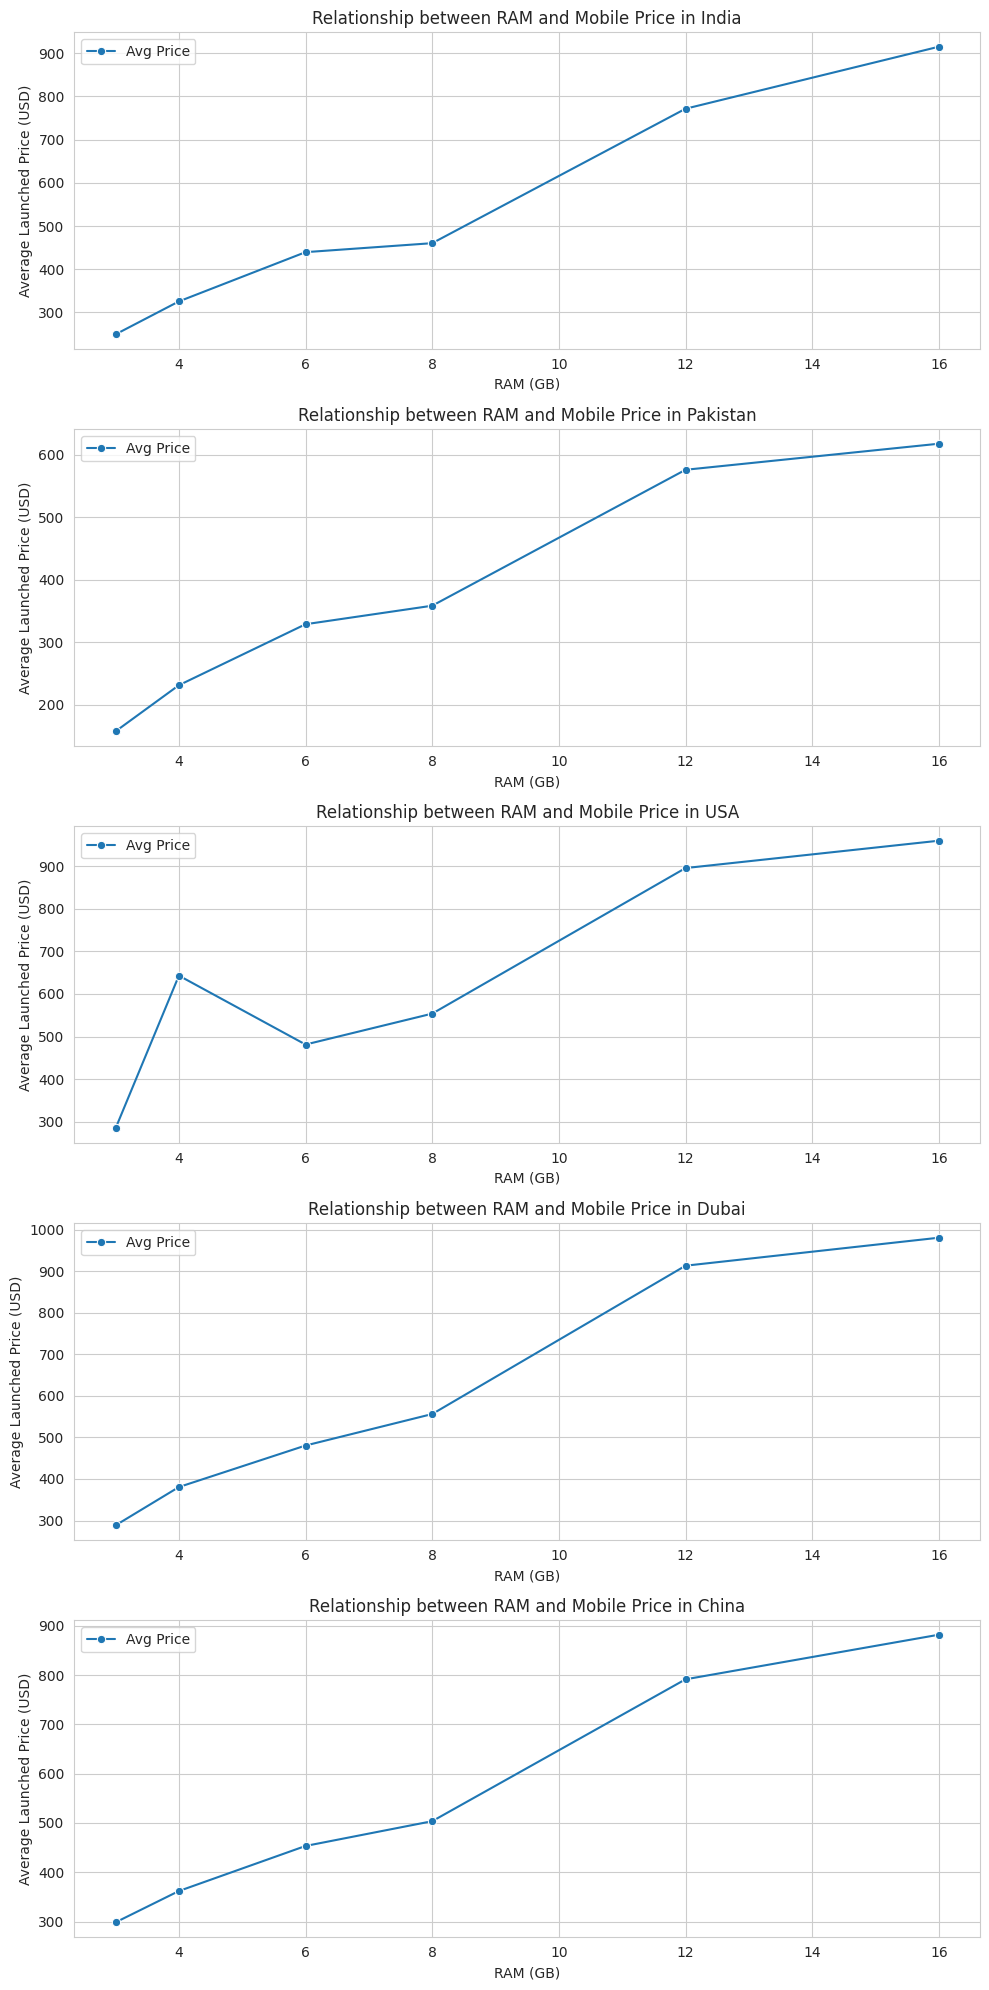

In [286]:
# relationship bw ram and mobile phone price in different countries
price_columns = [
    "Launched Price (India)",
    "Launched Price (Pakistan)",
    "Launched Price (USA)",
    "Launched Price (Dubai)",
    "Launched Price (China)"
]

# Create subplots for 5 graphs
fig, axes = plt.subplots(5, 1, figsize=(10, 20))  
axes = axes.flatten()

for i, price_col in enumerate(price_columns):
    avg_price_per_ram = Dataset.groupby('RAM(GB)')[price_col].mean()

    # Plot the line chart in the respective subplot
    sns.lineplot(x=avg_price_per_ram.index, y=avg_price_per_ram, 
                 marker='o', ax=axes[i], label='Avg Price')

    # Extract country name from column name
    country_name = price_col.replace("Launched Price (", "").replace(")", "") 

    # Set title and labels for each subplot
    axes[i].set_title(f"Relationship between RAM and Mobile Price in {country_name}")
    axes[i].set_xlabel("RAM (GB)")
    axes[i].set_ylabel("Average Launched Price (USD)")
    axes[i].legend()  # Now legend works correctly
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


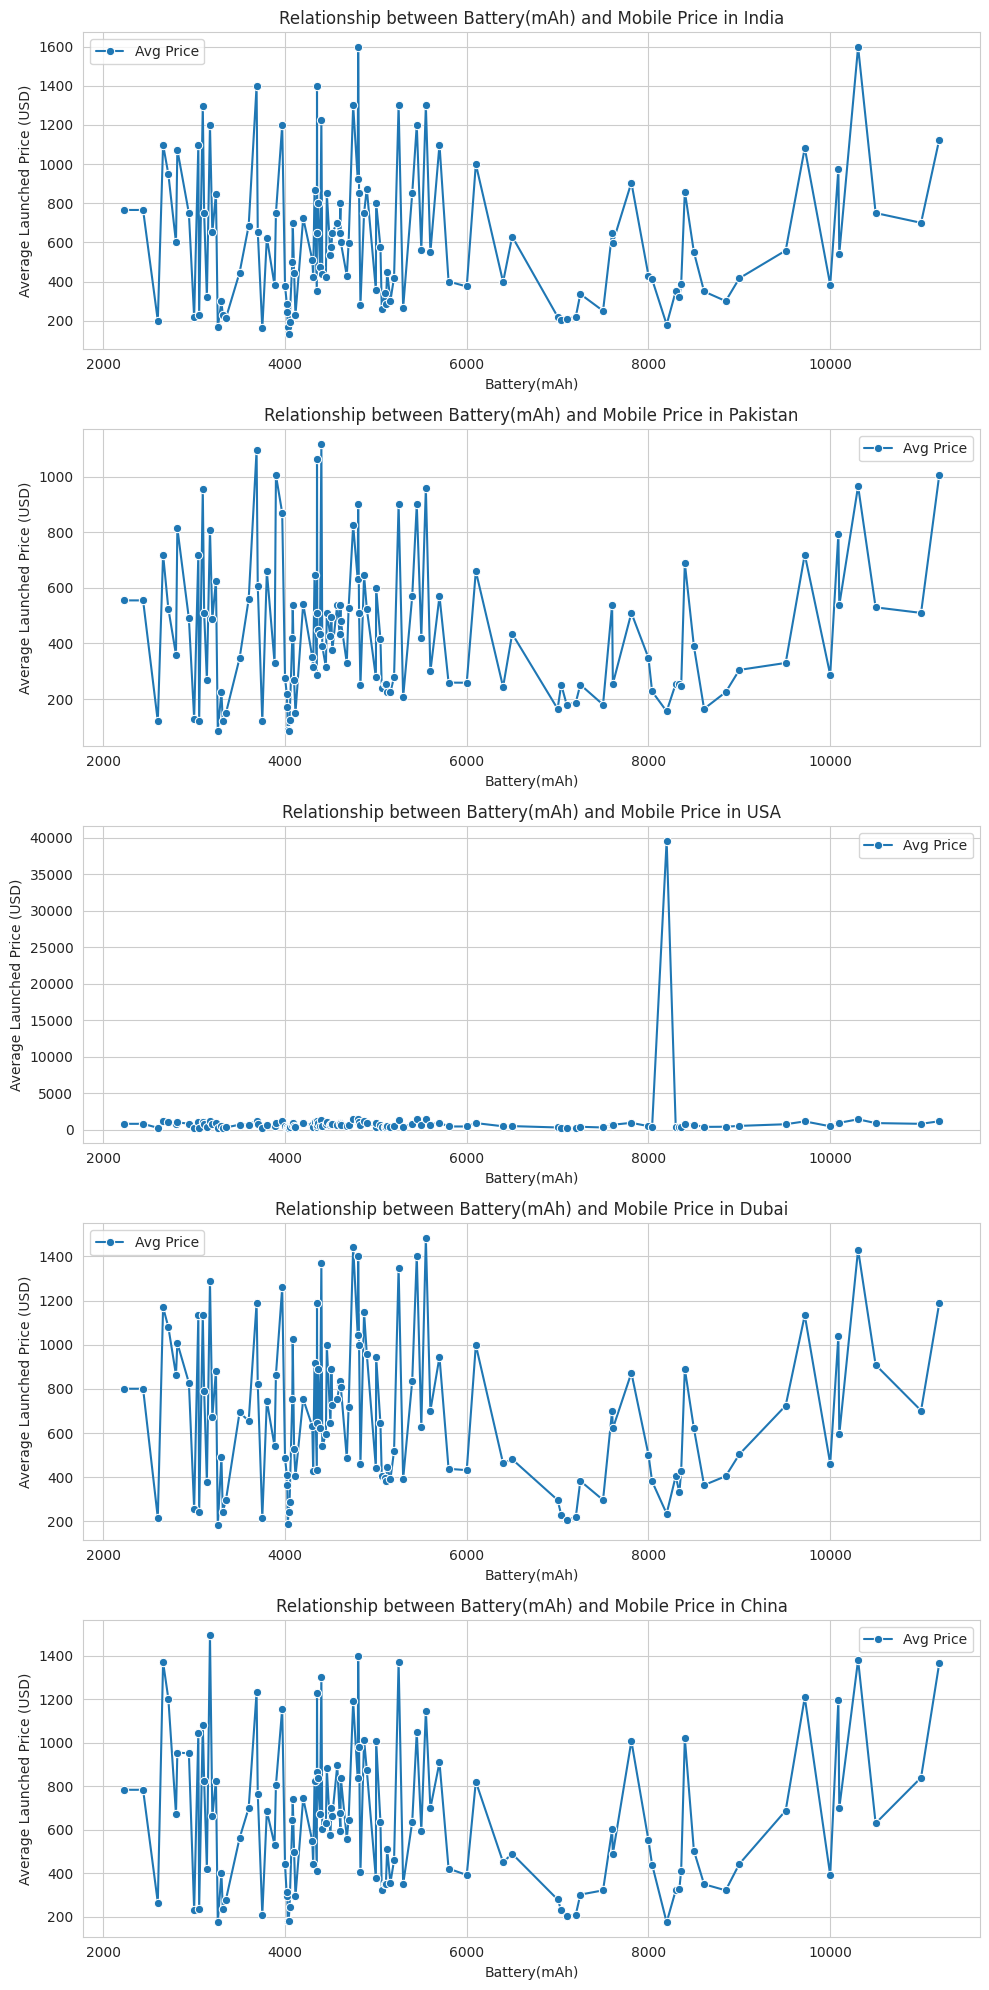

In [287]:
# relationship bw battery and mobile phone price in different countries
price_columns = [
    "Launched Price (India)",
    "Launched Price (Pakistan)",
    "Launched Price (USA)",
    "Launched Price (Dubai)",
    "Launched Price (China)"
]

# Create subplots for 5 graphs
fig, axes = plt.subplots(5, 1, figsize=(10, 20))  
axes = axes.flatten()

for i, price_col in enumerate(price_columns):
    avg_price_per_battery = Dataset.groupby('Battery(mAh)')[price_col].mean()

    # Plot the line chart in the respective subplot
    sns.lineplot(x=avg_price_per_battery.index, y=avg_price_per_battery, 
                 marker='o', ax=axes[i], label='Avg Price')

    # Extract country name from column name
    country_name = price_col.replace("Launched Price (", "").replace(")", "") 

    # Set title and labels for each subplot
    axes[i].set_title(f"Relationship between Battery(mAh) and Mobile Price in {country_name}")
    axes[i].set_xlabel("Battery(mAh)")
    axes[i].set_ylabel("Average Launched Price (USD)")
    axes[i].legend() 
    axes[i].grid(True)

plt.tight_layout()
plt.show()

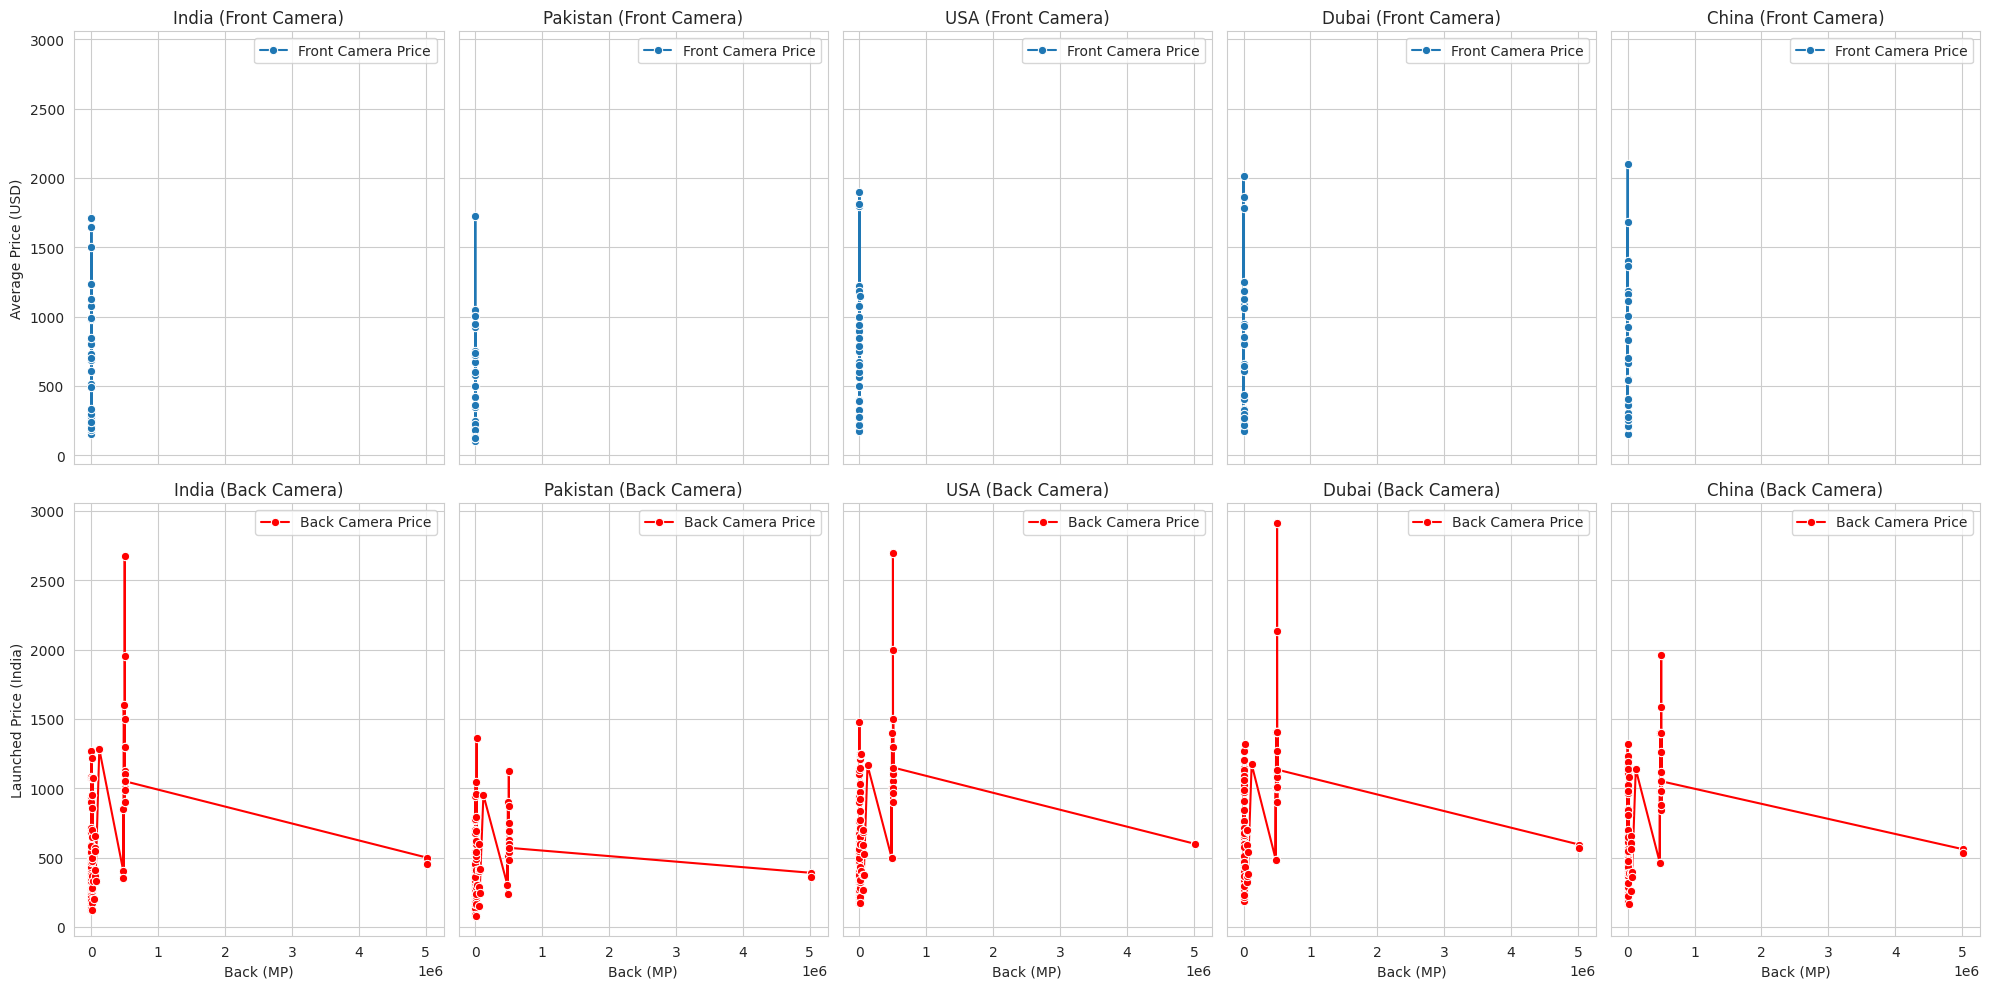

In [288]:
# relationship bw front and rear camera with respect to price in different countries

price_columns = [
    "Launched Price (India)",
    "Launched Price (Pakistan)",
    "Launched Price (USA)",
    "Launched Price (Dubai)",
    "Launched Price (China)"
]

# Create subplots (2 rows: Front & Back Camera, 5 columns for different countries)
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)

for i, price_col in enumerate(price_columns):
    # Calculate average price per Front(MP) MP
    avg_price_front = Dataset.groupby("Front(MP)")[price_col].mean()
    avg_price_back = Dataset.groupby("Back(MP)")[price_col].mean()

    # Extract country name
    country_name = price_col.replace("Launched Price (", "").replace(")", "")

    # Plot Front(MP) vs Price
    sns.lineplot(x=avg_price_front.index, y=avg_price_front, 
                 marker='o', ax=axes[0, i], label="Front Camera Price")
    axes[0, i].set_title(f"{country_name} (Front Camera)")
    axes[0, i].set_xlabel("Front(MP)")
    axes[0, i].set_ylabel("Average Price (USD)")
    axes[0, i].grid(True)
    axes[0, i].legend()

    # Plot Back Camera vs Price
    sns.lineplot(x=avg_price_back.index, y=avg_price_back, 
                 marker='o', ax=axes[1, i], label="Back Camera Price", color='red')
    axes[1, i].set_title(f"{country_name} (Back Camera)")
    axes[1, i].set_xlabel("Back (MP)")
    axes[1, i].grid(True)
    axes[1, i].legend()

plt.tight_layout()
plt.show()


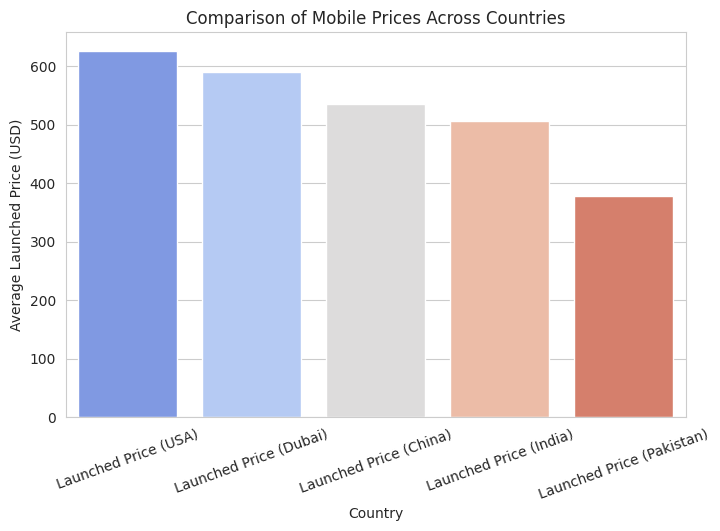

In [289]:
# Price variations across different countries
avg_price_by_country = Dataset[
    ["Launched Price (Pakistan)", 
     "Launched Price (India)", 
     "Launched Price (China)", 
     "Launched Price (USA)", 
     "Launched Price (Dubai)"]
].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")

plt.xlabel("Country")
plt.ylabel("Average Launched Price (USD)")
plt.title("Comparison of Mobile Prices Across Countries")
plt.xticks(rotation=20)
plt.show()

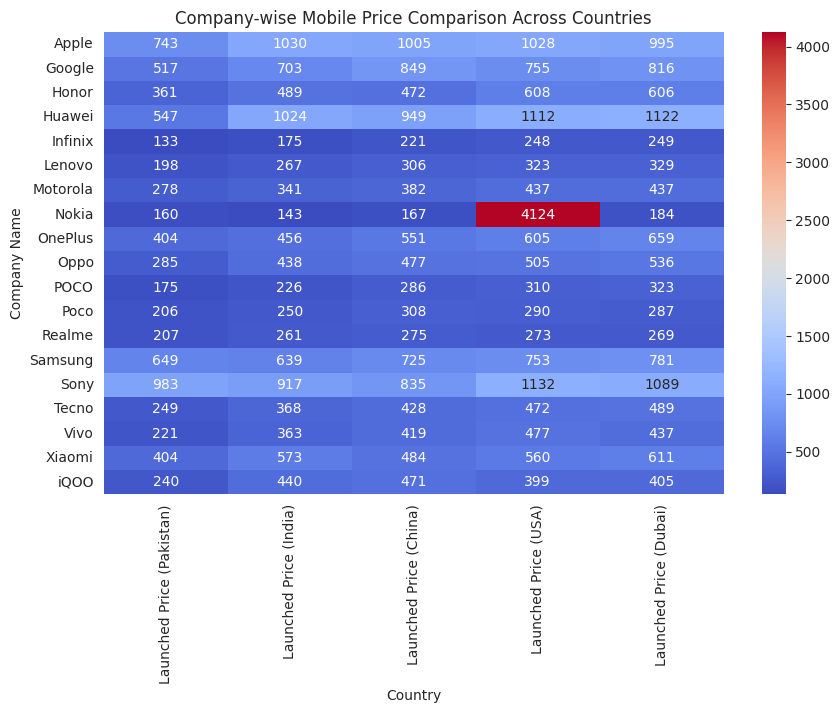

In [290]:
# Companywise price comparison acros countries
company_avg_price = Dataset.groupby("Company Name")[
    ["Launched Price (Pakistan)", 
     "Launched Price (India)", 
     "Launched Price (China)", 
     "Launched Price (USA)", 
     "Launched Price (Dubai)"]
].mean()
company_avg_price
plt.figure(figsize=(10,6))
sns.heatmap(company_avg_price, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Company-wise Mobile Price Comparison Across Countries")
plt.xlabel("Country")
plt.ylabel("Company Name")
plt.show()

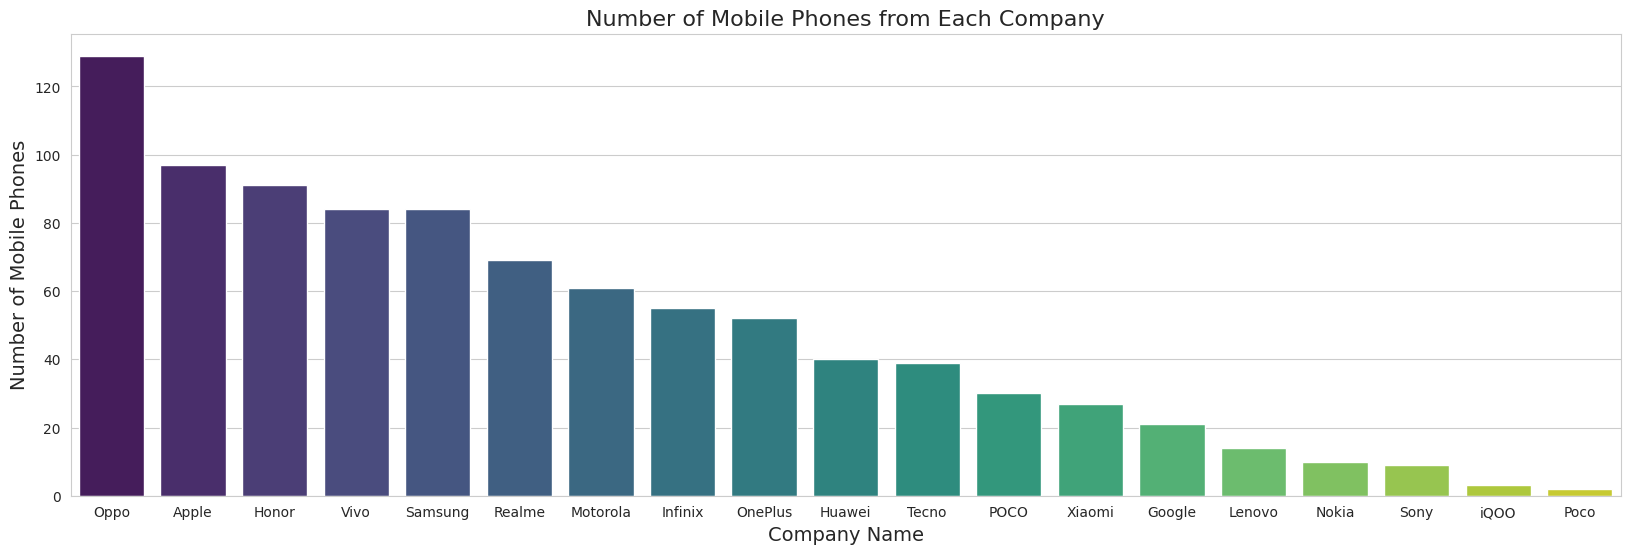

In [291]:
# Count the number of mobile phones from each company
mobile_counts = Dataset['Company Name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 6)) 
sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Mobile Phones', fontsize=14)
plt.title('Number of Mobile Phones from Each Company', fontsize=16)
plt.xticks(rotation=0) 
plt.show()

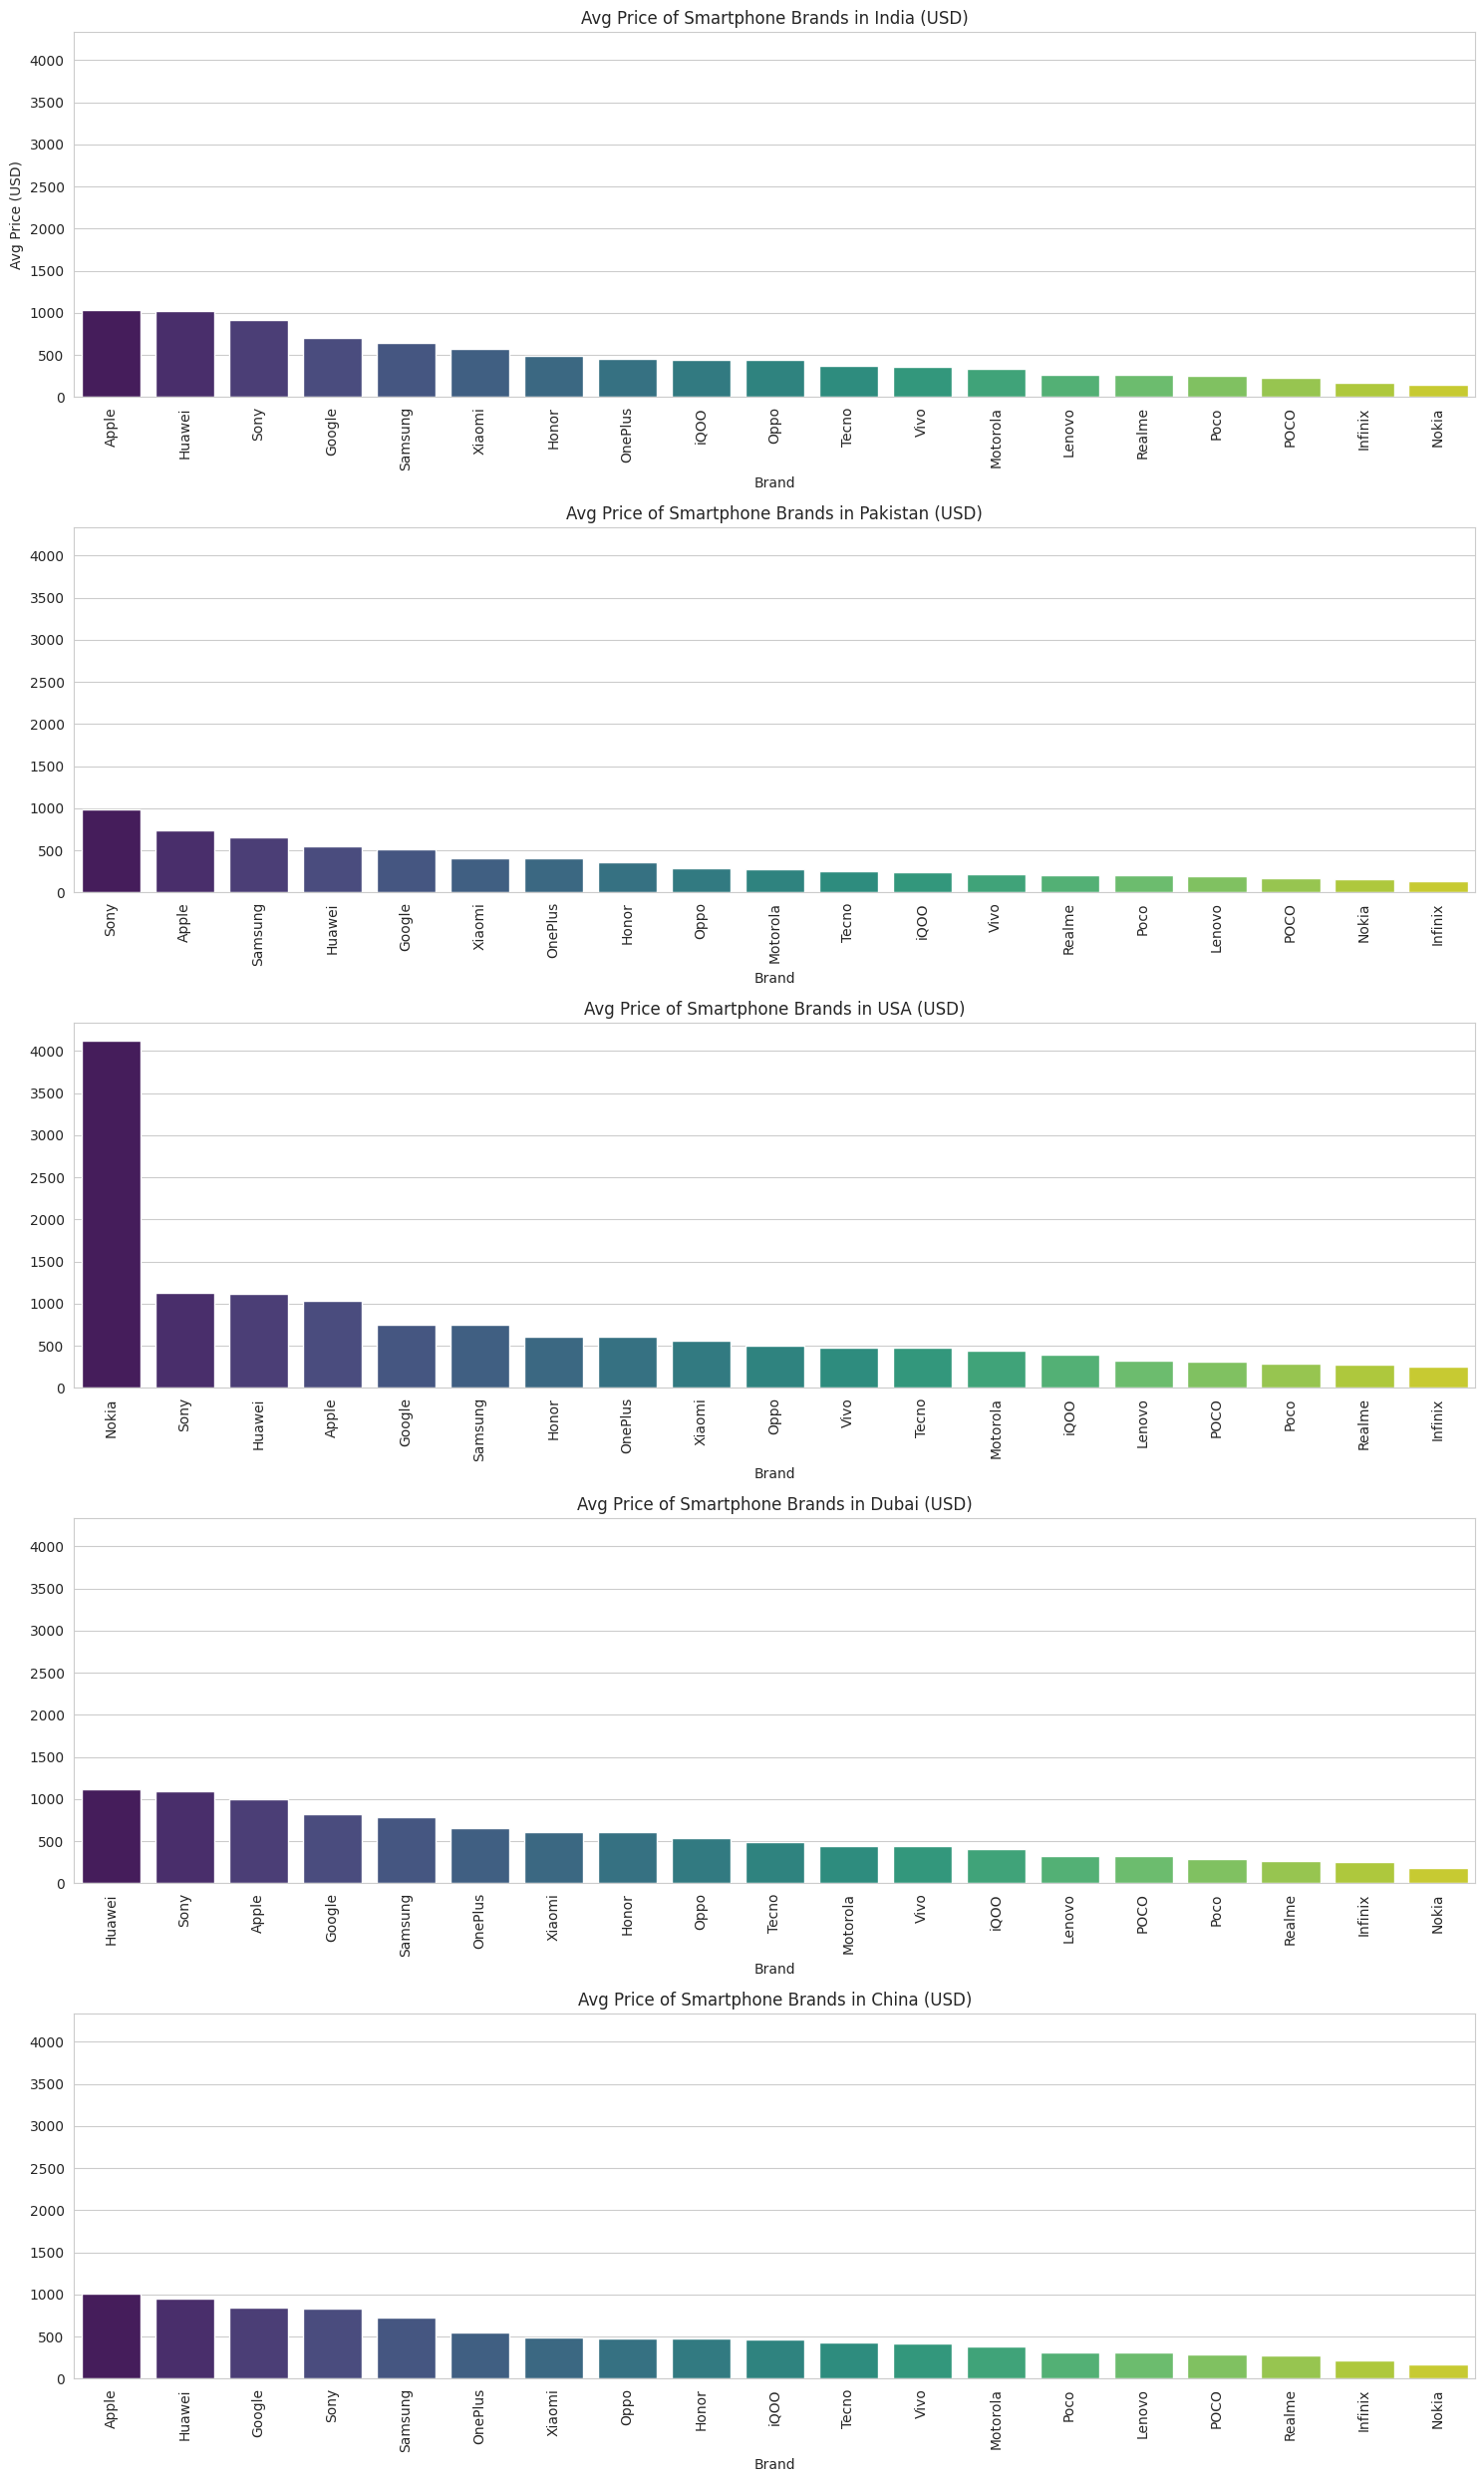

In [292]:
price_columns = {
    "India": "Launched Price (India)",
    "Pakistan": "Launched Price (Pakistan)",
    "USA": "Launched Price (USA)",
    "Dubai": "Launched Price (Dubai)",
    "China": "Launched Price (China)"
}

fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharey=True)

for i, (country, price_col) in enumerate(price_columns.items()):
    # Compute average pricing per brand
    brand_pricing = Dataset.groupby("Company Name")[price_col].describe()
    brand_pricing = brand_pricing.sort_values(by="mean", ascending=False).reset_index()

    # Plot bar chart in respective subplot
    sns.barplot(data=brand_pricing, x="Company Name", y="mean", ax=axes[i], palette="viridis")

    # Set title and labels
    axes[i].set_title(f"Avg Price of Smartphone Brands in {country} (USD)")
    axes[i].set_xlabel("Brand")
    axes[i].set_ylabel("Avg Price (USD)" if i == 0 else "") 
    axes[i].tick_params(axis='x', rotation=90)  
plt.tight_layout()
plt.show()


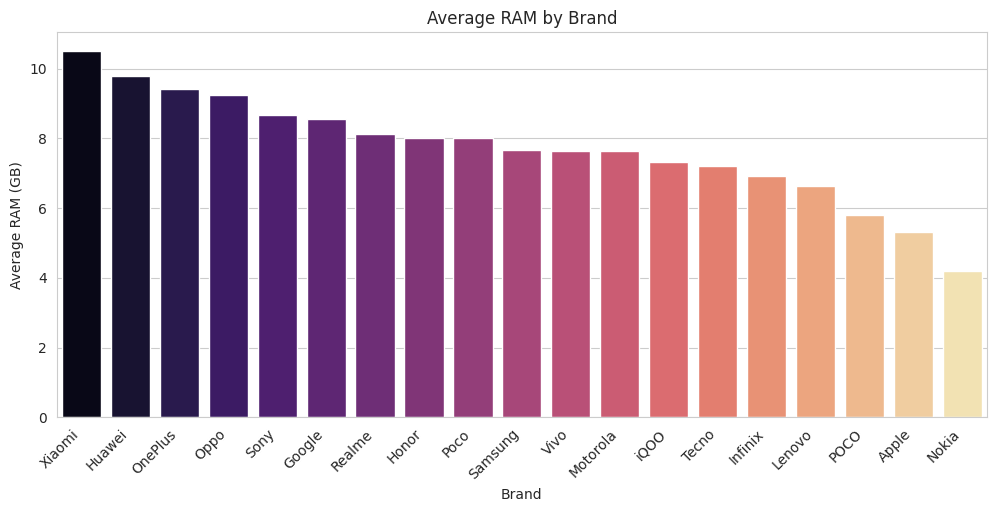

In [293]:
# Average price by Brand
brand_avg_ram = Dataset.groupby("Company Name")["RAM(GB)"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=brand_avg_ram.index, y=brand_avg_ram.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Brand")
plt.ylabel("Average RAM (GB)")
plt.title("Average RAM by Brand")
plt.show()

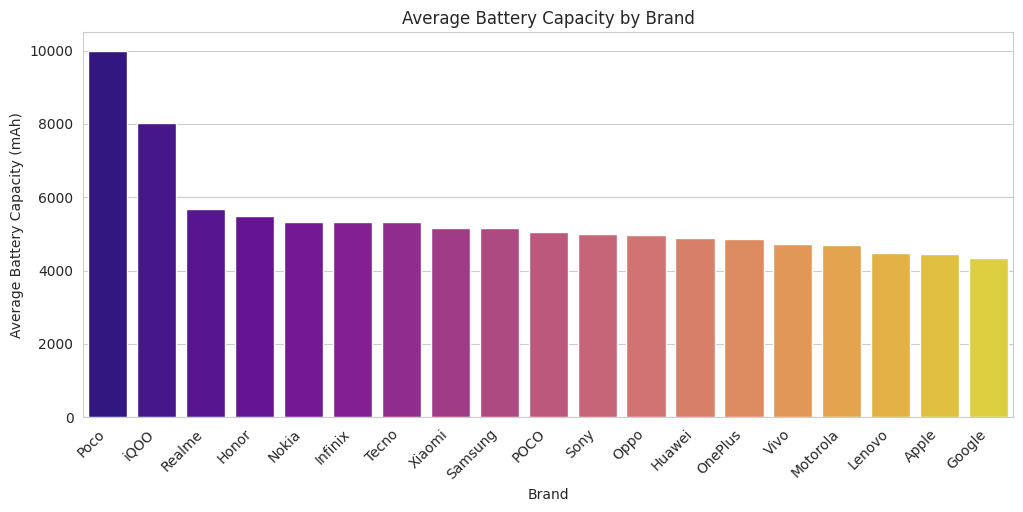

In [294]:
# Average Battery by brand
brand_avg_battery = Dataset.groupby("Company Name")["Battery(mAh)"].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(x=brand_avg_battery.index, y=brand_avg_battery.values, palette="plasma")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Brand")
plt.ylabel("Average Battery Capacity (mAh)")
plt.title("Average Battery Capacity by Brand")
plt.show()

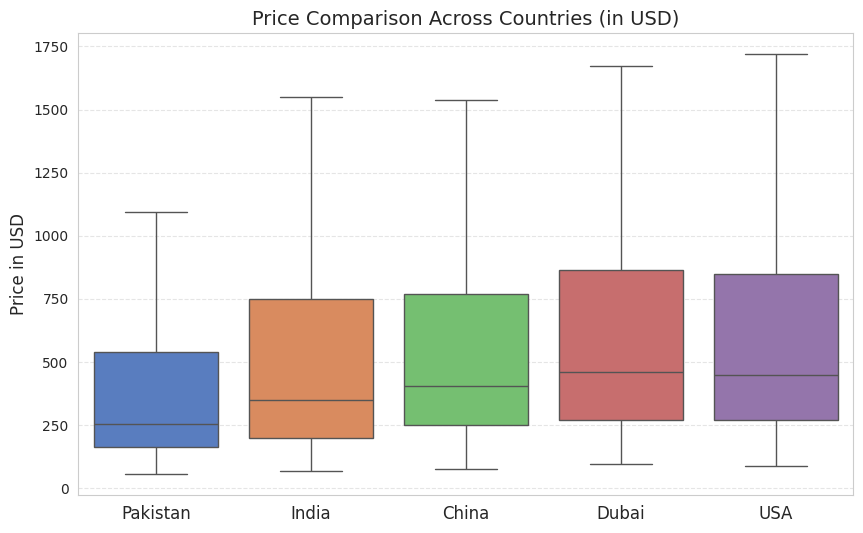

In [295]:
# Average price comparison across countries
plt.figure(figsize=(10, 6))
sns.boxplot(data=Dataset[
    ["Launched Price (Pakistan)", "Launched Price (India)", "Launched Price (China)", "Launched Price (Dubai)", "Launched Price (USA)"]
], showfliers=False, palette="muted")

plt.title("Price Comparison Across Countries (in USD)", fontsize=14)
plt.ylabel("Price in USD", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Pakistan", "India", "China", "Dubai", "USA"], fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Model for predicting price of Smart phones in india

In [296]:
Dataset

,Company Name,Model Name,Weight(g),RAM(GB),Front(MP),Back(MP),Processor,Battery(mAh),Size(inch),Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Avg_Price_USD
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,674.997,799.99,811.86,799.0,755.73,2024,768.3154
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,704.997,849.99,853.86,849.0,809.73,2024,813.5154
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,734.997,899.99,909.86,899.0,863.73,2024,861.5154
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.70,749.997,899.99,867.86,899.0,863.73,2024,856.1154
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.70,779.997,949.99,909.86,949.0,917.73,2024,901.3154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,POCO,M7 5G 128GB,198.0,6.0,8.0,50.0,MediaTek Dimensity 7025,5110,6.67,119.997,159.99,223.86,229.0,242.73,2024,195.1154
925,Poco,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,198.660,239.99,293.86,280.0,277.83,2024,258.0680
926,Poco,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,213.660,259.99,321.86,300.0,296.73,2024,278.4480
927,Samsung,Galaxy Z Fold6 256GB,239.0,12.0,104.0,50.0,Snapdragon 8 Gen 3,4400,7.60,1814.997,1649.99,1959.86,1899.0,1943.73,2024,1853.5154


In [297]:
# Removing some columns
Dataset = Dataset.drop(columns=['Launched Year', 'Launched Price (Pakistan)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)', 'Launched Price (India)'])

In [298]:
Dataset

,Company Name,Model Name,Weight(g),RAM(GB),Front(MP),Back(MP),Processor,Battery(mAh),Size(inch),Avg_Price_USD
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,768.3154
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,813.5154
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.10,861.5154
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.70,856.1154
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.70,901.3154
...,...,...,...,...,...,...,...,...,...,...
924,POCO,M7 5G 128GB,198.0,6.0,8.0,50.0,MediaTek Dimensity 7025,5110,6.67,195.1154
925,Poco,Pad 5G 128GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,258.0680
926,Poco,Pad 5G 256GB,571.0,8.0,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,278.4480
927,Samsung,Galaxy Z Fold6 256GB,239.0,12.0,104.0,50.0,Snapdragon 8 Gen 3,4400,7.60,1853.5154


In [ ]:
# Exporting user input field 
import json

user_input = {}

for i in range(0, len(Dataset.columns) - 1):
    # Convert numpy types to native Python types for JSON serialization
    unique_vals = Dataset[Dataset.columns[i]].unique().tolist()
    user_input[Dataset.columns[i]] = [str(val) if isinstance(val, (np.generic, bytes)) else val for val in unique_vals]

with open('user_input.json', 'w') as f:
    json.dump(user_input, f, indent=2)


In [300]:
# encoding categorical features
# List of categorical columns to encode
categorical_columns = ["Company Name", "Processor", "Model Name"]

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    Dataset[col] = le.fit_transform(Dataset[col])  # Convert text to numbers
    label_encoders[col] = le  # Store encoders for future use (if needed)

In [301]:
Dataset

,Company Name,Model Name,Weight(g),RAM(GB),Front(MP),Back(MP),Processor,Battery(mAh),Size(inch),Avg_Price_USD
0,0,871,174.0,6.0,12.0,48.0,7,3600,6.10,768.3154
1,0,872,174.0,6.0,12.0,48.0,7,3600,6.10,813.5154
2,0,873,174.0,6.0,12.0,48.0,7,3600,6.10,861.5154
3,0,874,203.0,6.0,12.0,48.0,7,4200,6.70,856.1154
4,0,875,203.0,6.0,12.0,48.0,7,4200,6.70,901.3154
...,...,...,...,...,...,...,...,...,...,...
924,10,310,198.0,6.0,8.0,50.0,60,5110,6.67,195.1154
925,11,500,571.0,8.0,8.0,8.0,185,10000,12.10,258.0680
926,11,501,571.0,8.0,8.0,8.0,185,10000,12.10,278.4480
927,13,239,239.0,12.0,104.0,50.0,190,4400,7.60,1853.5154


In [302]:
# Selecting features (independent variables) & target variable
features = ['RAM(GB)', 'Battery(mAh)', 'Size(inch)', 'Front(MP)', 'Back(MP)', 'Company Name', 'Processor', 'Model Name']
X = Dataset[features]
y = Dataset['Avg_Price_USD'] 

In [303]:
# Split dataset into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
# Initialize model
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Train model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 77.20784555434777
MSE: 25986.54072115701
RMSE: 161.20341411135502
R² Score: 0.8290838714108119


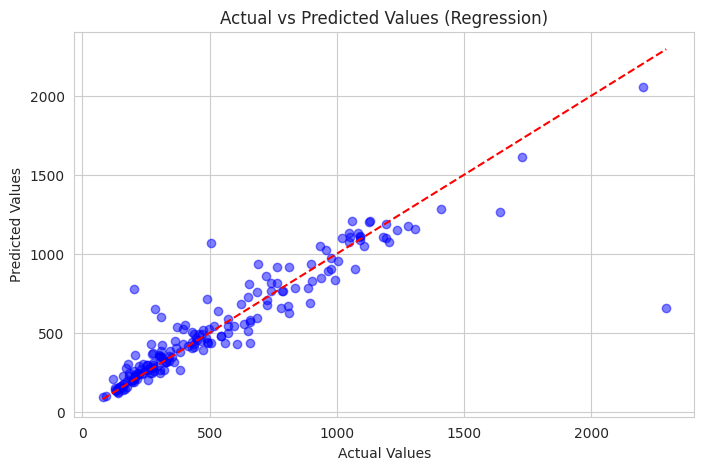

In [305]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Regression)")
plt.show()


# Exporting model in pickle file

In [306]:
import pickle
with open('bytephone-2025.pickle','wb') as f:
    pickle.dump(rf,f)